# SWMAL Exercise

## Learning Curves

### The Generalization Error, Over- and Underfitting, Early Stopping, and Optimal Capacity

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning (Ian Goodfellow, et. al. [DL]), which pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">


### Qa) The Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.

# TODO: ...in text
assert False, "TODO: write some text.."

### Qb Learning Curves

Next, produce a loss vs epoch graph ala (from `04_training_linear_models.ipynb` [GITHOML]) 

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/training_curve.png" alt="WARNING: could not get image from server.">


for your linear regressor, `MyLinReg`, from an earlier lesson. You need a function 

>```LossHistory()```

on your regressor class, that accumulates the internally calculated $J$'s. Once `LossHistory` is ready, plot it using the code below.

In [30]:
import numpy as np

class MyLinReg():
    def __init__(self, eta0=0.01, max_iter=10, tol=1e-3, n_iter_no_change=5, verbose=True):
        self.eta0 = eta0
        self.max_iter = max_iter
        self.tol = tol
        self.n_iter_no_change = n_iter_no_change
        self.verbose = verbose
        self.loss_hist = []

    def __str__(self):
        return "MyLinReg.__str__(): hi!"
    
    def batch_gradient_decent(self): 
        # Compute predictions for all samples
        Y_pred = self.predict(self.X)
        
        # Compute batch gradients
        dW = self.X.T.dot(Y_pred - self.Y) / self.m  # Mean gradient for weights
        db = np.mean(Y_pred - self.Y)  # Mean gradient for bias

        # Update weights using full dataset gradients
        self.W = self.W - self.eta0 * dW
        self.b = self.b - self.eta0 * db
        
        return self
    
    def stocastic_gradient_decent(self):
        # Pick one random sample (stochastic)
        i = np.random.randint(0, self.m)  # Random index
        X_i = self.X[i].reshape(1, -1)  # Make it a row vector
        Y_i = self.Y[i]  # Corresponding target

        # Compute prediction
        Y_pred = self.predict(X_i)

        # Compute gradient (SGD formula)
        dW = X_i.T.dot(Y_pred - Y_i)  # Gradient for weights
        db = Y_pred - Y_i

        # Update weights
        self.W = self.W - self.eta0 * dW
        self.b = self.b - self.eta0 * db

    def fit(self, X, y):
        self.m, self.n = X.shape
         # weight initialization           
        self.W = np.zeros( self.n )           
        self.b = 0          
        self.X = X           
        self.Y = y 

        best_loss = float('inf')
        no_change_count = 0
                    
        # gradient descent learning                  
        for i in range(self.max_iter):
            Y_pred = self.predict(self.X)
            loss = np.mean((self.Y - Y_pred) ** 2)  # Mean Squared Error (MSE)
            
            self.loss_hist.append(loss)

            if self.verbose:
                print(f"Iteration {i+1}, Loss: {loss}")

            # Check for convergence
            if abs(best_loss - loss) < self.tol:
                no_change_count += 1
                if no_change_count >= self.n_iter_no_change:
                    if self.verbose:
                        print(f"Stopping early at iteration {i+1} due to no improvement.")
                    break
            else:
                no_change_count = 0  # Reset count if loss decreases

            best_loss = loss

            self.batch_gradient_decent()               
        
        return self
    
    def predict(self, X):
        return X @ self.W.reshape(-1, 1) + self.b  # Ensure proper matrix multiplication

    def score(self, X, y_true):
        """Compute R^2 (coefficient of determination) score."""
        y_pred = self.predict(X)  # Ensure predictions are 1D

        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
        ss_residual = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
        
        r2_score = 1 - (ss_residual / ss_total)  # Compute R^2
        return r2_score
    
    def LossHistory(self):
        return self.loss_hist

Iteration 1, Loss: 5901425308.702746
Iteration 2, Loss: 236240487.22190106
Iteration 3, Loss: 235151945.01861715
Iteration 4, Loss: 234071602.52713862
Iteration 5, Loss: 232996586.22784454
Iteration 6, Loss: 231926869.86067882
Iteration 7, Loss: 230862427.29647458
Iteration 8, Loss: 229803232.53488374
Iteration 9, Loss: 228749259.7037426
Iteration 10, Loss: 227700483.05843988
Iteration 11, Loss: 226656876.9812873
Iteration 12, Loss: 225618415.98089448
Iteration 13, Loss: 224585074.69154572
Iteration 14, Loss: 223556827.872581
Iteration 15, Loss: 222533650.40777916
Iteration 16, Loss: 221515517.304744
Iteration 17, Loss: 220502403.69429463
Iteration 18, Loss: 219494284.82985735
Iteration 19, Loss: 218491136.0868614
Iteration 20, Loss: 217492932.9621377
Iteration 21, Loss: 216499651.07331988
Iteration 22, Loss: 215511266.158249
Iteration 23, Loss: 214527754.07438096
Iteration 24, Loss: 213549090.79819643
Iteration 25, Loss: 212575252.4246147
Iteration 26, Loss: 211606215.16640902
Iterati

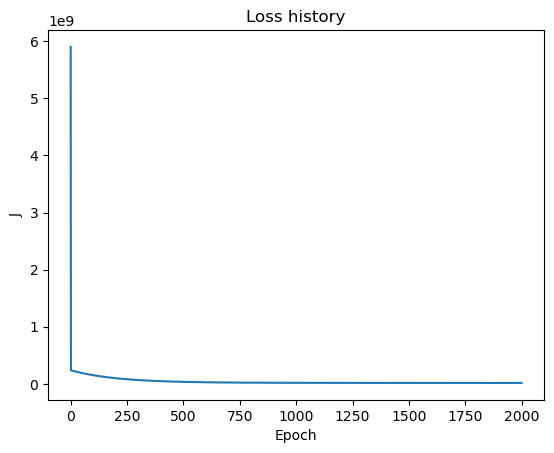

score_sklearn0.9655650870599127
score0.9655650870599127
OK


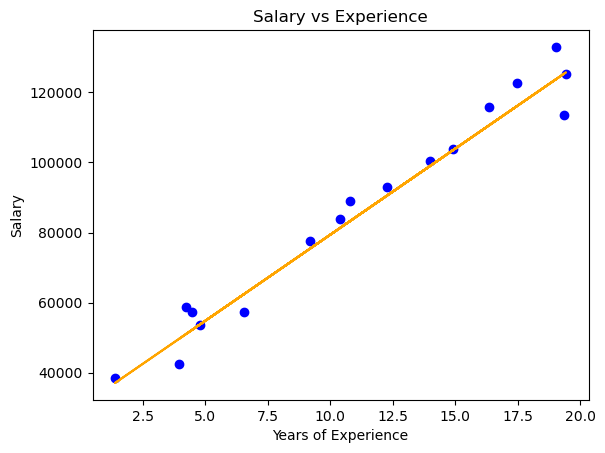

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 50  # Number of data points
X = np.random.uniform(1, 20, num_samples).reshape(-1, 1)  # Random years of experience between 1 and 20
true_W = 5000  # True weight (salary increase per year)
true_b = 30000  # True bias (base salary)
noise = np.random.normal(0, 5000, num_samples).reshape(-1, 1)  # Add Gaussian noise (stddev = 5000)
Y = true_W * X + true_b + noise  # Linear relationship with noise

# Convert to DataFrame and save to CSV (optional)
df = pd.DataFrame(np.hstack((X, Y)), columns=["YearsExperience", "Salary"])
df.to_csv("synthetic_salary_data.csv", index=False)  # Save dataset to CSV

# Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)


# Model training     
r = MyLinReg(max_iter=2000) 
r.fit( X_train, Y_train ) 

h = r.LossHistory()

# Plot of J vs. epoch (or perhaps iteration)...

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(h)

ax.set_title("Loss history")
ax.set_xlabel("Epoch")
ax.set_ylabel("J")

zoom_axis = False
if zoom_axis:
    limits_x = ax.get_xlim()
    limits_y = ax.get_ylim()
    ax.set_ylim([0, limits_y[1]/10]) # zoom on y axis
    
plt.show()

score = r.score(X_test,Y_test)
score_sklearn = r2_score(Y_test, r.predict(X_test))
print(f"score_sklearn{score_sklearn}")
print(f"score{score}")
print("OK")

Y_pred = r.predict(X_test)

# Visualization on test set     
plt.scatter( X_test, Y_test, color = 'blue' )    
plt.plot( X_test, Y_pred, color = 'orange' )   
plt.title( 'Salary vs Experience' ) 
plt.xlabel( 'Years of Experience' )   
plt.ylabel( 'Salary' ) 
plt.show() 

### Qc)  Early Stopping

Then implement ___early stopping___, in your `MyLinReg` estimator. Below is a graphical view of early stopping similar to Figure 4-20 p.162 [HOML] (for a non-linear model?)

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/early_stopping.png" alt="WARNING: could not get image from server.">

Write an explanation of the early stopping concept in text, implement it in your linear regressor and write some test/demo code, that via some learning-curve graphs demonstrates how it works when training your linear regressor in both _batch-gradient descent_ and 
_stochastic gradient descent_ modes.

In [32]:
assert False, "TODO: implement early stopping

SyntaxError: unterminated string literal (detected at line 1) (3604015922.py, line 1)

### Qd:  [OPTIONAL]  Using a Polynomial Regressor to Produce an Error-vs-Capacity Graph

Finally, create a polynomial estimator based on your `MyLinReg`, see details of
how to expend a linear regressor to a polynomial fitting in [HOLM] or in

> https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
 
that contains most of the code you will need. 
 
With a polynomial regressor, you should be able to reproduce a graph similar to Figure 5.3 from Deep Learning [DL], where you notice that the _x-axis_ is capacity and not _epoch_ as the learning curves you just produced in Qb/c.

In [ ]:
assert False "TODO: implement a polynomial-fit pipeline, and create an Error-vs-Capacity plot..

pipeline = Pipeline([
      ("polynomial_features", polynomial_features),
      ("linear_regression",   MyLinReg())
  ])


### Qe Conclusion

Sum it all up in a nice, well-written conclusion.

REVISIONS||
:-|:-
2018-12-19| CEF, initial.                  
2018-02-14| CEF, major update and put in sync with under/overfitting exe.         
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, minor text updates, and made Qc optional.
2018-02-25| CEF, updated code, made more functions.
2018-03-11| CEF, corrected RSME to RMSE.
2019-10-08| CEF, updated to ITMAL E19.
2020-03-14| CEF, updated to ITMAL F20.
2020-10-15| CEF, updated to ITMAL E20.
2020-11-17| CEF, added a comment on 90-degree polynomial, made early stopping a pseudo code exe.
2021-03-22| CEF, changed crossref from "capacity_under_overfitting.ipynb Qc" to Qa+b in QdExplain the Polynomial RMSE-Capacity Plot. 
2021-03-23| CEF, changed 'cv RMSE' legend to 'validation RMSE'.
2021-10-31| CEF, updated to ITMAL E21.
2022-03-25| CEF, updated to SWMAL F22.
2023-03-16| CEF, minor update to SWMAL F23.
2024-09-25| CEF, major update, combined  generalization_error.ipynb and capacity_under_overfitting.ipynb, removed review parts, added graphs plots for MyLinReg.
2024-10-14| CEF, minor text updates.